## Chapter 1.4

Analysis of poetry collections metadata (1835-1840)

In [1]:
library(tidyverse)

library(patchwork)
library(wesanderson)
library(MetBrewer)
library(gghighlight)
theme_set(theme_minimal())

# fix problems with cyrillics
library(extrafont)
library(showtext)
font_add("Arial", "/Library/Fonts/Arial.ttf") 
showtext_auto()

pal <- c(wes_palette("Chevalier1")[4], # sand
         wes_palette("Royal1")[1], # grey
         wes_palette("Zissou1")[4], # yellow
         wes_palette("Royal1")[2] # red
        ) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'MetBrewer':
  method        from       
  print.palette wesanderson

Registering fonts with R

Ładowanie wymaganego pakietu: sysfonts

Ładowanie wymaganego pakietu: showtextdb


Dołączanie pakietu: ‘showtextdb’


Następujący obiekt został zakryty z ‘package:extrafont’:

    font_install




In [ ]:
# do not run
# how`data/01_4 fil` was done
#`meta/collections_meta.cs` is derived from `numbers_meta/biblio_poetry_1830_1850_short.numbers`
# 
# pb <- read.csv("../../meta/collections_meta.csv", sep = ";") %>%
#     # add older ids where available
#     mutate(COL_ID = ifelse(!is.na(COL_ID), paste0("COL_", COL_ID), COL_ID)) %>% 
#     select(id, COL_ID,
#           poetry_prose, book_type, genre, special_tag,
#           author_sign, author, author_full_name,
#           title,
#           city, publisher, year,
#           pages, size_fold, size_cm, 
#           digital_copy, digital_copy_URL)
# 
# glimpse(pb)
# 
# #write.csv(pb, file = "../../data/01_4_poetry_books_1835_1840.csv")
# rm(pb)

Load dataset:

In [2]:
pb_full <- read.csv("../../data/01_4_poetry_books_1835_1840.csv") %>% 
    select(-X) %>%
    mutate(year = as.numeric(year),
          group = paste0(book_type, "_", genre),
          # cleaning of tagging artefacts
          group = str_replace_all(group, "(alm).*", "\\1"),
          group = str_remove_all(group, "; nar")) 

glimpse(pb_full)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `year = as.numeric(year)`.
Caused by warning:
! pojawiły się wartości NA na skutek przekształcenia”


Rows: 1,105
Columns: 19
$ id               <int> 1143, 1147, 1167, 1151, 1257, 1250, 1245, 1168, 1223,…
$ COL_ID           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ poetry_prose     <chr> "pr", "pr", "v", "pr", "v", "v", "v", "v", "v", "pr",…
$ book_type        <chr> "alm", "alm", "col", "alm", "col", "sep", "sep", "col…
$ genre            <chr> "", "", "lyr", "", "lyr", "nar", "lyr", "lyr", "lyr",…
$ special_tag      <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "…
$ author_sign      <chr> "Аладьин Е. (изд.)", "Аладьин Е. (изд.)", "Алипанов Е…
$ author           <chr> "Аладьин Е.В. (изд.)", "Аладьин Е.В. (изд.)", "Алипан…
$ author_full_name <chr> "Аладьин Егор Васильевич", "Аладьин Егор Васильевич",…
$ title            <chr> "Невский альманах на 1830 год, изд. Е. Аладьиным", "П…
$ city             <chr> "СПб.", "СПб.", "СПб.", "М.", "Ревель", "СПб.", "М.",…
$ publisher        <chr> "Плюшара", "Деп. народн. просвещ.", "Экс. загот. гос.…
$ year          

#### Plot 1.4.0 - Digitisation

In [6]:
n_digit <- pb_full %>% 
    filter(group != "col_nar") %>% 
    mutate(group = recode(group,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>%
    mutate(dig = ifelse(digital_copy == "" | str_detect(digital_copy, "drive"), 
                        FALSE, 
                        TRUE)
           ) %>%
    group_by(year, group, dig) %>% 
    count() %>%
    ggplot(aes(x = year, y = n, fill = as.factor(dig))) + 
        geom_col() + 
        facet_wrap(~group, 
                   scales = "free_x",
                   ncol = 4) + 
        scale_fill_manual(values = c(wes_palette("Chevalier1")[3],
                             wes_palette("Chevalier1")[1])) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        labs(x = "",
             y = "Количество книг",
             fill = "") + 
        theme(axis.text = element_text(size = 12),
              axis.title = element_text(size = 14),
             strip.text = element_text(size = 14),
             legend.position = "None") + 
        annotate("rect", 
                 xmin = 1834.5, xmax =1840.5, 
                 ymin = 0, ymax = Inf, 
                 alpha = 0.1)

# n_digit

In [7]:
perc_digit <- pb_full %>% 
    filter(group != "col_nar") %>% 
    mutate(group = recode(group,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>%
    mutate(dig = ifelse(digital_copy == "" | str_detect(digital_copy, "drive"), 
                        FALSE, 
                        TRUE)
           ) %>%
    group_by(year, group, dig) %>% 
    count() %>%
    ggplot(aes(x = year, y = n, fill = as.factor(dig))) + 
        geom_col(position = "fill") + 
        facet_wrap(~group, 
                   scales = "free_x",
                   ncol = 4) + 
        scale_fill_manual(values = c(wes_palette("Chevalier1")[3],
                             wes_palette("Chevalier1")[1])) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        labs(x = "Год",
             y = "Процент книг",
             fill = "Оцифровано") + 
        theme(axis.text = element_text(size = 12),
              axis.title = element_text(size = 14),
             strip.text = element_text(size = 14),
             legend.position = "bottom") + 
        annotate("rect", 
                 xmin = 1834.5, xmax =1840.5, 
                 ymin = 0, ymax = Inf, 
                 alpha = 0.2)

# perc_digit

Combine two plots:

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


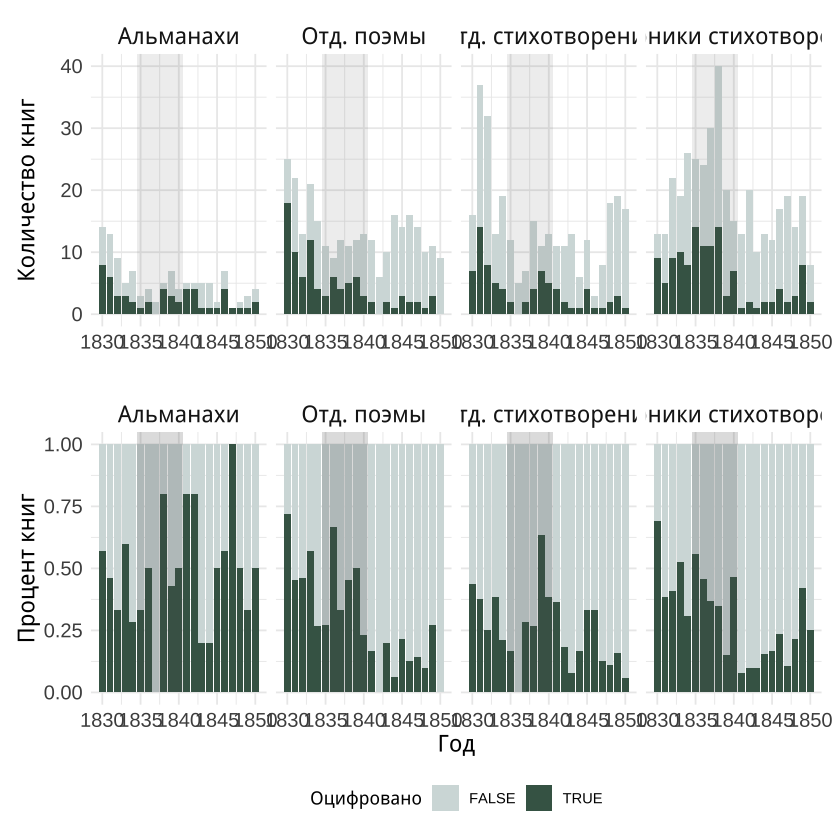

In [5]:
digit <- n_digit / perc_digit

digit

# ggsave("plots/Fig_1-4-0.png", plot = digit, dpi = 300,
#        width = 11, height = 7,
#        bg = "white")

rm(digit, n_digit, perc_digit)

### **Clean metadata with only lyric poetry between 1835 and 1840**

In [3]:
pb <- pb_full %>% 
    filter(year > 1834 & year < 1841) %>% 

    # remove completely unknown books (not found either in 19-c. catalogues nor in modern ones)
    filter(special_tag != "unknown") %>%
    
    # for now I also filter out all narrative poems!
    filter(!str_detect(group, "nar")) %>%
    
    # recode group names
    mutate(group_abbr = group,
          group_eng = recode(group,
                         alm = "Almanacks",
                         col_lyr = "Lyric collections",
                         col_nar = "Narrative collections",
                         sep_nar = "Narrative booklets",
                         sep_lyr = "Lyric booklets"),
          group = recode(group_abbr,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>% 
    
    # fill author's names if unavailable
    mutate(author = ifelse(author == "" & author_sign != "", author_sign, author))

pb %>% 
    count(group)

group,n
<chr>,<int>
Альманахи,25
Отд. стихотворения,54
Сборники стихотворений,139


In [ ]:
# test how many books are containing prose (except for almanacks)
pb %>%
    filter(poetry_prose == "pr" & book_type != "alm")

#### Plot 1.4.1. Number of books by category

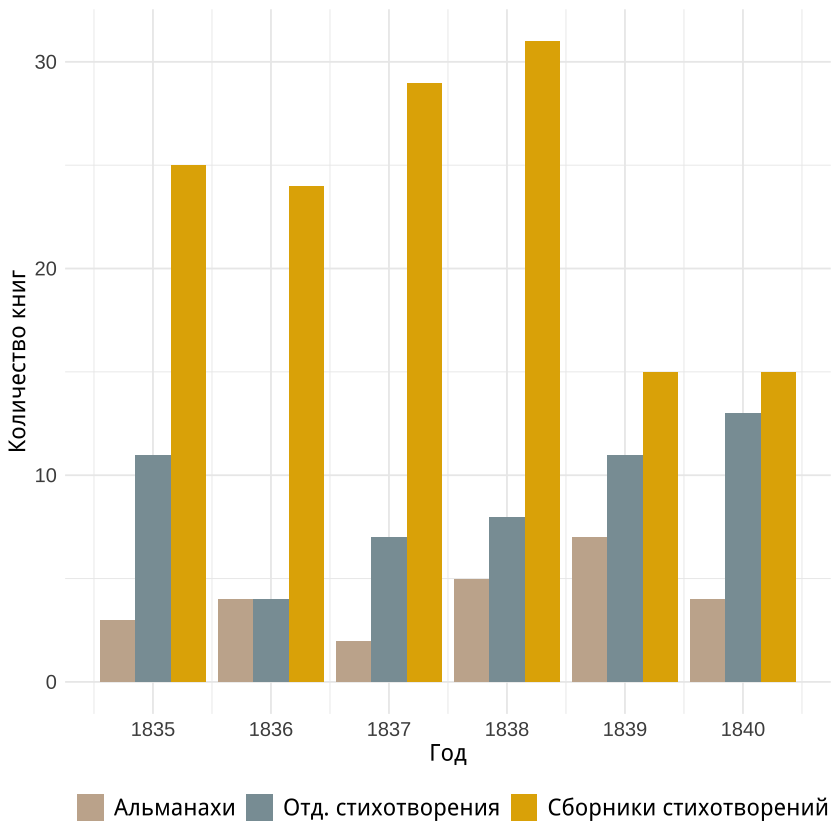

In [10]:
pb %>% 
    group_by(group, year) %>% 
    count() %>%
    ggplot(aes(x = year, y = n,# color = group, 
               fill = group)) + 
        # geom_line() + geom_point() +
        #facet_wrap(~group_rus, scales = "free_x") +
        geom_col(position = "dodge") + 
        scale_fill_manual(values = pal) + 
        scale_x_continuous(breaks = seq(1835,1840,1)) +
        theme(
            legend.position = "bottom",
            axis.title = element_text(size = 14),
            axis.text = element_text(size = 12),
            legend.text = element_text(size = 14)
        ) + 
        labs(x = "Год", y = "Количество книг", fill = "")

# ggsave(file = "plots/Fig_1-4-1.png", plot = last_plot(), dpi = 300,
#     width = 10, height = 8, bg = "white")

#### Plot 1.4.2. Boxplots w/ n of pages and size in cm

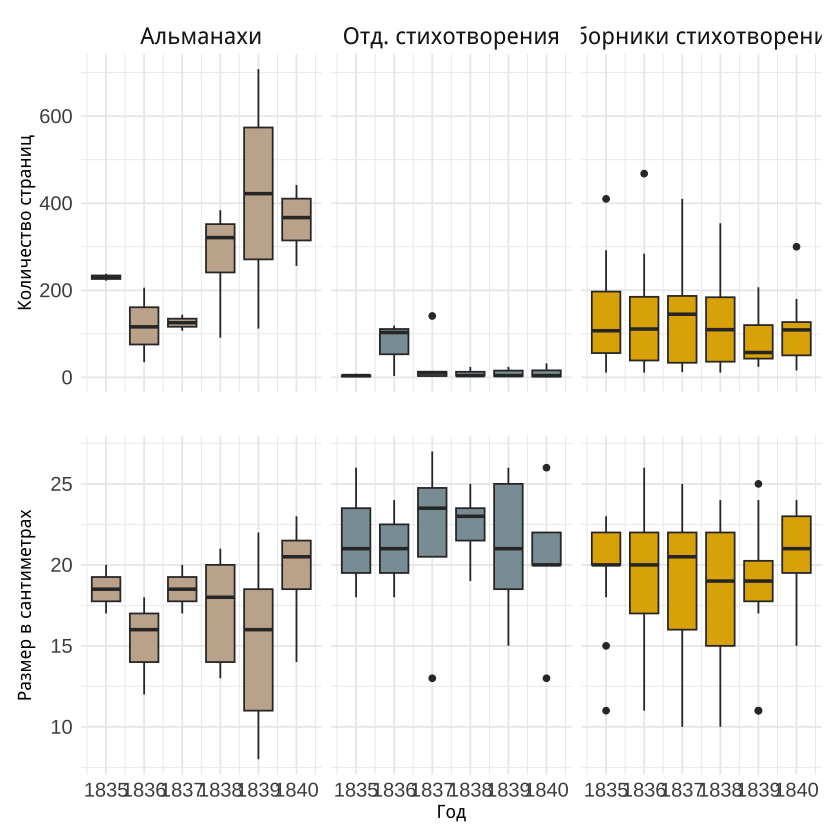

In [11]:
p1 <- pb %>% 
    filter(!is.na(pages)) %>%
    ggplot(aes(x = year, y = pages, group = year, 
               #color = group, 
               fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            axis.text.x = element_blank(), # removed years from x axis for the upper plot
            strip.text = element_text(size = 14)
        ) + 
        labs(x = "", y = "Количество страниц") 

p2 <- pb %>% 
    filter(!is.na(size_cm)) %>% 
    ggplot(aes(x = year, y = size_cm, group = year, fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        scale_x_continuous(breaks = seq(1835, 1840, 1)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            strip.text = element_blank() # remove facet labels for lower plot
        ) + 
        labs(x = "Год", y = "Размер в сантиметрах")

p3 <- p1 / p2

p3

# ggsave("plots/Fig_1-4-2.png", plot = p3, dpi = 300, bg = "white",
#       width = 12, height = 8)

Full version of the plot

Warning message:
“Removed 1 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing missing values (`stat_boxplot()`).”


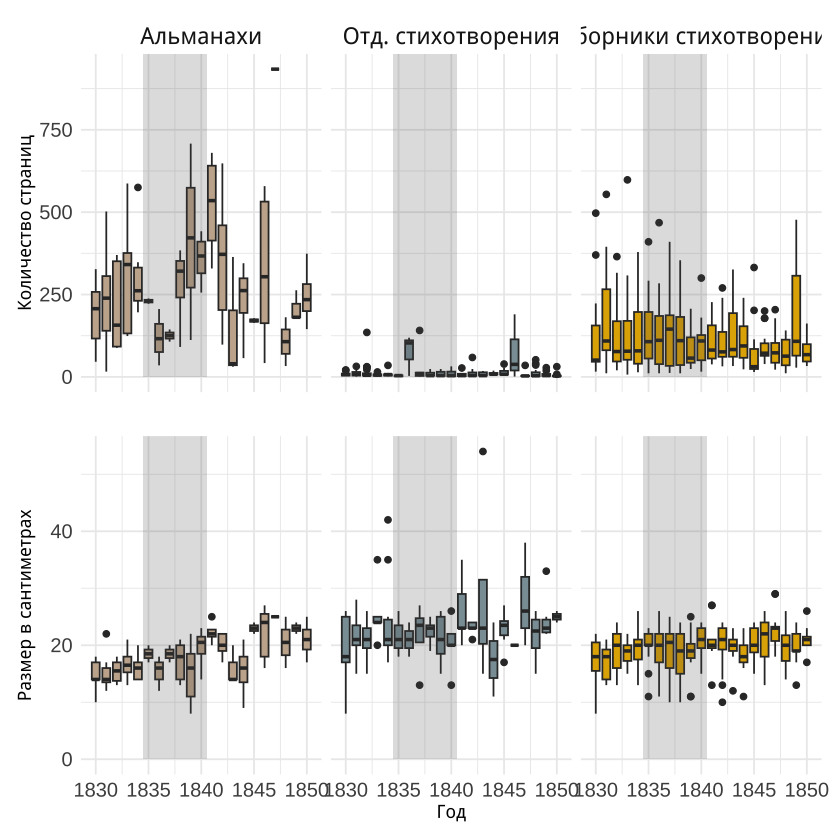

In [12]:
p1 <- pb_full %>% 
    filter(!str_detect(group, "nar")) %>%
    filter(!is.na(pages)) %>% 
    mutate(group = recode(group,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>%
    ggplot(aes(x = year, y = pages, group = year, 
               #color = group, 
               fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            axis.text.x = element_blank(), # removed years from x axis for the upper plot
            strip.text = element_text(size = 14)
        ) + 
        labs(x = "", y = "Количество страниц") + 
      annotate("rect", 
                 xmin = 1834.5, xmax =1840.5, 
                 ymin = 0, ymax = Inf, 
                 alpha = 0.2)
        

p2 <- pb_full %>% 
    filter(!str_detect(group, "nar")) %>%
    filter(!is.na(size_cm)) %>% 
    mutate(group = recode(group,
                            alm = "Альманахи",
                            col_lyr = "Сборники стихотворений",
                         col_nar = "Сборники поэм",
                         sep_nar = "Отд. поэмы",
                         sep_lyr = "Отд. стихотворения")) %>%
    ggplot(aes(x = year, y = size_cm, group = year, fill = group)) + 
        geom_boxplot() + 
        facet_wrap(~group) + 
        scale_x_continuous(breaks = seq(1830, 1850, 5)) +
        scale_fill_manual(values = pal) + 
        theme(
            legend.position = "None",
            axis.text = element_text(size = 12),
            strip.text = element_blank() # remove facet labels for lower plot
        ) + 
        labs(x = "Год", y = "Размер в сантиметрах") + 
        annotate("rect", 
                 xmin = 1834.5, xmax =1840.5, 
                 ymin = 0, ymax = Inf, 
                 alpha = 0.2)


p3 <- p1 / p2

p3

# ggsave("plots/Fig_1-4-2_full.png", plot = p3, dpi = 300, bg = "white",
#       width = 11, height = 8)

In [13]:
rm(p1,p2,p3)

### Lyric collections

In [14]:
lyr <- pb %>% 
  filter(group_abbr == "col_lyr" & special_tag != "unknown")

glimpse(lyr)

Rows: 139
Columns: 21
$ id               <int> 68, 90, 69, 83, 70, 91, 92, 342, 71, 73, 633, 74, 133…
$ COL_ID           <chr> "COL_2", "COL_200", "COL_3", "COL_13", "COL_4", NA, "…
$ poetry_prose     <chr> "v", "v", "pr", "v", "v", "v", "v", "v", "v", "v", "v…
$ book_type        <chr> "col", "col", "col", "col", "col", "col", "col", "col…
$ genre            <chr> "lyr", "lyr", "lyr", "lyr", "lyr", "lyr; nar", "lyr",…
$ special_tag      <chr> "", "", "", "", "", "", "", "", "", "", "double", "",…
$ author_sign      <chr> "Баратынский Е.", "Бенедиктов В.", "Венгер Н.", "Геев…
$ author           <chr> "Баратынский Е.А.", "Бенедиктов В.Г.", "Венгер Н.", "…
$ author_full_name <chr> "Баратынский Евгений Абрамович", "Бенедиктов Владимир…
$ title            <chr> "Сочинения Е. Баратынского: В 2 ч.", "Стихотворения В…
$ city             <chr> "М.", "СПб.", "М.", "Харьков", "СПб.", "СПб.", "СПб."…
$ publisher        <chr> "Семена", "Вингебера", "Селивановского", "Ун. тип", "…
$ year            

In [15]:
lyr %>% 
  filter(!is.na(pages) & !is.na(size_cm)) %>% 
  summarise(mean_p = mean(pages),
            med_p = median(pages),
            mean_s = mean(size_cm),
            med_s = median(size_cm))

mean_p,med_p,mean_s,med_s
<dbl>,<int>,<dbl>,<int>
127.252,110,19.2126,20


Top authors

In [18]:
lyr_authors <- lyr %>% 
    filter(author != "") %>% 
    count(author, sort = T) %>% head(15)

lyr_authors

lyr %>% 
  filter(author %in% lyr_authors$author) %>% 
  select(author, title, year) %>% 
  arrange(-desc(author))

,author,n
,<chr>,<int>
1,Крылов И.А.,4
2,Бенедиктов В.Г.,3
3,Демидов М.А.,3
4,Зилов А.М.,3
5,Максимов М.И.,3
6,Меркли М.М.,3
7,Полежаев А.И.,3
8,Пуговишников А.М.,3
9,Пушкин А.С.,3


author,title,year
<chr>,<chr>,<dbl>
Бенедиктов В.Г.,Стихотворения Владимира Бенедиктова,1835
Бенедиктов В.Г.,Стихотворения Владимира Бенедиктова / Изд. 2-е,1836
Бенедиктов В.Г.,Стихотворения В. Бенедиктова. Кн. 2.,1838
Быстроглазов А.,Стихотворения А. Быстроглазова. В 2 ч. Ч. 1,1837
Быстроглазов А.,Стихотворения А. Быстроглазова. В 2 ч. Ч. 2,1837
Данков И.И.,Блины. Соч. И. Д.: Стихотворения,1839
Данков И.И.,Красное яичко или Светлодневный подарок москвичам : [Сб. стихотворений],1839
Демидов М.А.,Разные разности. Стихотворения М. Демидова,1838
Демидов М.А.,Ау: Стихотворения М. Демидова,1839


Smallest & biggest lyric collections (in size, cm)

In [19]:
lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(-desc(size_cm)) %>% head(10)

lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(desc(size_cm)) %>% head(10)

,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 32-я тыс.,Смирдина,1837,410,8,10
2,Крылов И.А.,Басни Ивана Крылова : В восьми книгах. - 33-я тыс.,Смирдина,1837,410,8,10
3,Дмитриев И.И.,Басни и апологи И.И. Дмитриева,Воен. тип.,1838,178,32,10
4,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 30-я тысяча.,Смирдина,1835,410,4,11
5,А. Ф. Ф.,Роза и Василек. Соч. А.Ф.Ф.,Экс. загот. гос. бумаг,1836,11,,11
6,Баласогло А.П.<?>,Стихотворения Веронова,Сахарова,1838,209,8,11
7,Данков И.И.,Блины. Соч. И. Д.: Стихотворения,Ун. тип,1839,37,,11
8,Данков И.И.,Красное яичко или Светлодневный подарок москвичам : [Сб. стихотворений],Ун. тип,1839,57,,11
9,Полежаев А.И.,Кальян. Стихотворения Полежаева / Изд. 3,Алексеев,1838,186,,12


,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Лавров Н.,"Нравственные результаты XIX века, и стихотворения. Соч. Н. Лаврова",Вингебера,1836,73,8,26
2,Бутырский Н.И.,И моя доля в сонетах. В 2 ч. Соч. Бутырского,Вингебера,1837,NA,8,25
3,Дьячков С.П.,"Букет цветов или разные стихотворения, элегические романсы и песни для прекрасных девиц. Соч. С. Дьячковым",Вингебера,1837,31,16,25
4,Леонов А.А.,Стихотворения Алексея Леонова. 1834-1838,Губ. тип.,1839,148,,25
5,Аполлон де ***,Стихотворения Аполлона де ***,Селивановского,1836,41,8,24
6,Тростин Х.Д.,Стихотворения Христофора Тростина,Ун. тип,1836,32,8,24
7,Мартынов А.,Поэтические произведения А. Мартынова. В 3-х кн.,Вингебера,1837,249,8,24
8,Аладьина Е.В.,Сочинения Е.В.А…,Вингебера,1838,24,,24
9,Кульман Е.Б.,"Полное собрание Русских, Немецких и Италиянских Стихотворений Елисаветы Кульман. Кн. 1. Пиитические опыты. Изд. 2-е",Акад. наук,1839,207,,24


Smallest lyric collections in the number of pages & the thickiest

In [20]:
lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(-desc(pages)) %>% head(10)

lyr %>% 
    select(author, title, publisher, year, pages, size_fold, size_cm) %>%
    arrange(desc(pages)) %>% head(10)

,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Риль Ю.,Четыре русских песни / С аккомп. ф-п. посвященные Ее Сиятельству Графине Наталье Павловне Строгоновой Ю. Рилем.,Пеца,1835,11,,NA
2,А. Ф. Ф.,Роза и Василек. Соч. А.Ф.Ф.,Экс. загот. гос. бумаг,1836,11,,11
3,Макшеева В.Д. / Молчанова В.,"Стихотворения, сочиненные девицей B.М.",Глазунова,1838,11,12,NA
4,Моствило-Головач Т.,Стихотворения П. Моствило-Головача,Губ. правления,1838,11,8,21
5,,Разные стихотворения,Лазаревых,1837,12,,16
6,Максимов М.И.,Патриотические песни : Тетрадь 2,Ун. тип,1836,13,,NA
7,Саблин Е.И.,Полевой цветок: Стихотворения Евгения Саблина,Губ. правления,1840,16,8,23
8,Хлебников Н.,Подарок друзьям в Новый год : [Сб. стихотворений] Н. Х.......ва,Гинце,1835,19,,20
9,,Стихотворения молодого Черкеса,Ун. тип,1837,20,8,22


,author,title,publisher,year,pages,size_fold,size_cm
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,Кашкин Д.Е.,Сочинения Дмитрия Кашкина: В 3 т. Т. 1,Степанова,1836,468,8,21
2,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 30-я тысяча.,Смирдина,1835,410,4,11
3,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 32-я тыс.,Смирдина,1837,410,8,10
4,Крылов И.А.,Басни Ивана Крылова : В восьми книгах. - 33-я тыс.,Смирдина,1837,410,8,10
5,Бестужев А.А. (Марлинский),Полное собрание сочинений А. Марлинского. Ч. 11. Стихотворения и полемические статьи / Изд. 3-е,III Отд. собств. Е.И.В. канц.,1838,354,,20
6,Тимофеев А.В.,Опыты. В 3 ч. Ч. 1. [Стихотворения],Н. Глазунова,1837,347,8,22
7,Башкатов А.,"Быль и заблуждение моего ума и сердца. Соч. Алексея Башкатова, в стихах и прозе",Евреинова,1838,303,8,23
8,Крылов И.А.,Басни Ивана Крылова : В 8 кн. 40-я тысяча.,Плюшара,1840,300,,23
9,Жуковский В.А.,Стихотворения Василья Жуковского: В 8 ч. / Изд. 4-е. Т. 1. Орлеанская дева; лирические стихотворения,Экс. загот. гос. бумаг,1835,292,,22


### Separate editions

In [21]:
sep_authors <- pb %>% 
  filter(group_abbr == "sep_lyr" & author != "") %>% 
  group_by(author) %>% 
  count(sort = T) %>% 
  head(10)

sep_authors

pb %>% 
  filter(group_abbr == "sep_lyr" & author %in% sep_authors$author) %>% 
  select(author, title, year) %>% 
  arrange(-desc(author))

author,n
<chr>,<int>
Левицкий И.,3
Орлов А.А.,3
Глинка Ф.Н.,2
Лисенецкий С.Ф.,2
Мысовский-Светогорский С.Д.,2
Хвостов Д. И.,2
Аксаков К.С.,1
Ан-в,1
Барановский В.,1


author,title,year
<chr>,<chr>,<dbl>
Аксаков К.С.,"Стихи, читанные в день празднования учреждения Императорского Московского университета 12-го января 1835",1835
Ан-в,"Послание к О. Иоанну, в г. Новоалександровск: [Стихотворение]",1838
Барановский В.,Портрет Д. А. И. Р. Л. Соч. Василья Барановского,1838
Бенецкий Н.Ф.,За царя : [Стихотворение] / Пер. Н. Б-н-ц-кий,1835
Глинка Ф.Н.,Воспоминание о пиитической жизни Пушкина. Посвящена отцу поэта,1837
Глинка Ф.Н.,Москве благотворительной : [Стихотворение],1840
Левицкий И.,"Стих в честь его преосвяществу Иоанну Снегурскому бискупу перемыскому, самборскому … дня 8 месяца мая 1837 года во Валяве, яко в день его высокого тезоименитства … Иосифом Левицким … сложенный",1837
Левицкий И.,"Стих во часть его превосходительству … Михаилу Левицкому, метрополите галицкому … во день святого архистратига Михаила дня 8 ноября 1838 … Иосифом Левицким",1838
Левицкий И.,Стих во честь его преосвященству Василию Поповичу епископу мункачовскому … во день поставления его преосвященства на епископа … сложенный Иосифом Левицким,1838


Some random examples of separate editions:

In [22]:
pb %>% 
  filter(group_abbr == "sep_lyr" & author != "") %>% 
  sample_n(size = 10) %>% 
  select(author, title, city, year)

pb %>% 
  filter(group_abbr == "sep_lyr" #& str_detect(author, "Барановский")
         ) %>% 
  sample_n(size = 10) %>% 
  select(author, title, city, year)

author,title,city,year
<chr>,<chr>,<chr>,<dbl>
Поднебесный М.М.,Стихотворение: Мысли при гробе Графа М.М. Сперанского,СПб.,1839
Доброхотов Ф.,Взгляд на поэзию Феофила Доброхотова,М.,1838
Ободовский П.Г.,Царский цветник : Der Kaisergarten. Ein Gedicht von P. Obodofskoy. Uebers. [в стихах] von Karl Friedrich von Grossheinrich,СПб.,1840
Жуковский В.А.,Бородинская годовщина,М.,1839
Рыбников А.Н.,"Его высокородию господину директору Московской практической коммерческой академии и Общества любителей коммерческих знаний, президенту евангелическо-лютеранской консистории, статскому советнику и разных орденов кавалеру, Андрею Ивановичу Шредеру : [Стихотворение]",М.,1840
Сиянов П.Г.,Ек... Ив... Б.л.г.в.кой : Стихотворение,СПб.,1840
Хвостов Д. И.,А... Л...... О...... ой 1835 года июля 26 дня,СПб.,1835
Хвостов Д. И.,Стихи на освящение Собора всех учебных заведений в России июля 20 дня 1835 года / граф Хвостов,СПб.,1835
Полонский Я.П.,Татарка : [Стихотворение] : (Посв. Ф. Байкову),,1840


author,title,city,year
<chr>,<chr>,<chr>,<dbl>
,"Хвалебное приношение веры новопрославленному Святителю Митрофану, Епископу Воронежскому. Стихотворение в пяти песнях",М.,1836
Тяпкин,Глас приветствия сирот своему попечителю отцу,М.,1836
,Стихотворение на столетие литейного дома с арсенала в Петербурге 1835 года 6 августа,СПб.,1835
,Стихи на новоселье в типографии,СПб.,1837
,Вице-адмиралу Крузенштерну в день его юбилея 21 генваря 1839 : [Стихи],СПб.,1839
Бенецкий Н.Ф.,За царя : [Стихотворение] / Пер. Н. Б-н-ц-кий,Ревель,1835
Рыбников А.Н.,"Его высокородию господину директору Московской практической коммерческой академии и Общества любителей коммерческих знаний, президенту евангелическо-лютеранской консистории, статскому советнику и разных орденов кавалеру, Андрею Ивановичу Шредеру : [Стихотворение]",М.,1840
Хомяков А.С.,Киев : [Стихотворение],,1839
Ан-в,"Послание к О. Иоанну, в г. Новоалександровск: [Стихотворение]",СПб.,1838


### City of publishing

In [23]:
pb %>% 
  count(city, sort = T)

city,n
<chr>,<int>
СПб.,103
М.,89
Харьков,5
,4
Одесса,3
Ярославль,3
Ведень,2
Киев,2
Пшемысль,2


In [24]:
pb %>% 
  mutate(typo = paste0(city, ": ", publisher)) %>% 
  filter(!city %in% c("", "М.", "СПб.")) %>% 
  count(typo, sort = T)

typo,n
<chr>,<int>
Харьков: Ун. тип,4
Ярославль: Губ. правления,3
Ведень: Мехитаристöв,2
Киев: Ун. тип,2
Одесса: В город. т.,2
Пшемысль:,2
Вильно: Гликсберга,1
Дерпт: Лаакманна,1
Львов:,1


In [25]:
pb %>% 
  filter(city != "") %>% 
  group_by(year, city) %>% 
  count(sort = F) %>% 
  pivot_wider(names_from = year, values_from = n)

city,1835,1836,1837,1838,1839,1840
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
М.,13,17,14,18,13,14
Ревель,1,NA,NA,NA,NA,NA
СПб.,24,13,22,20,13,11
Харьков,1,1,NA,NA,3,NA
Ярославль,NA,1,NA,1,NA,1
Львов,NA,NA,1,NA,NA,NA
Ведень,NA,NA,NA,1,NA,1
Одесса,NA,NA,NA,1,2,NA
Пшемысль,NA,NA,NA,2,NA,NA


#### Plot 1.4.3

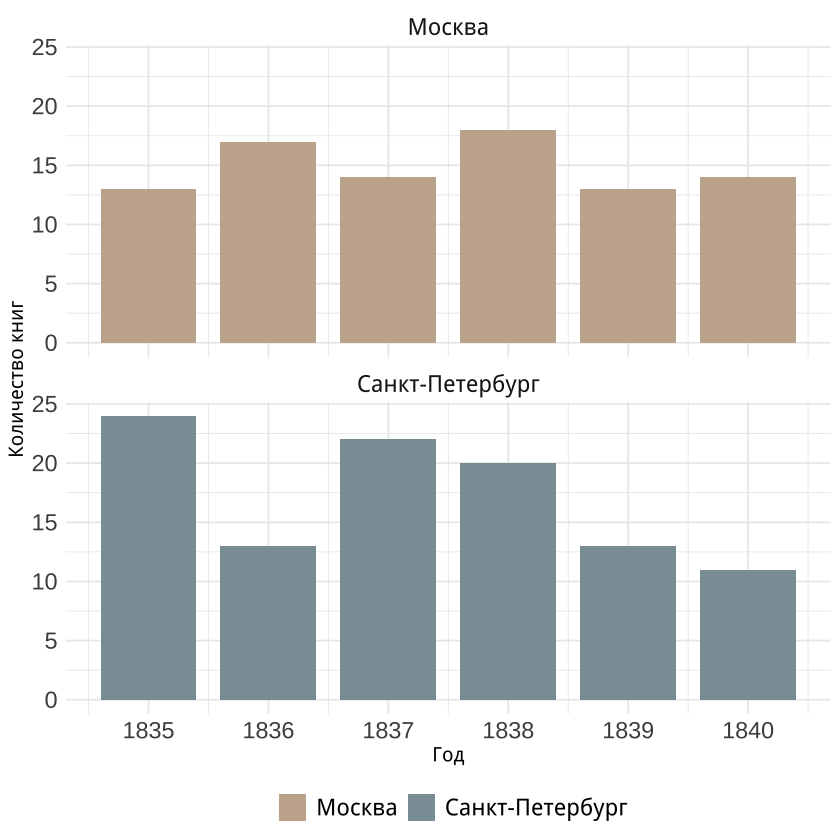

In [26]:
pb %>% 
  #filter(group_abbr == "col_lyr") %>% 
  filter(city %in% c("СПб.", "М.")) %>% 
  count(city, year) %>% 
  mutate(city = ifelse(city == "М.", "Москва", "Санкт-Петербург")) %>% 
  ggplot(aes(x = year, y = n, fill = city)) + 
  geom_col(position = "dodge", width = 0.8) + 
  #geom_smooth(aes(color = city)) + 
  facet_wrap(~city, ncol = 1) + 
  scale_x_continuous(breaks = seq(1835, 1840, 1)) + 
  scale_fill_manual(values = pal) + 
  scale_color_manual(values = pal) + 
  labs(x = "Год", y = "Количество книг", fill = "") + 
  theme(strip.text = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 12),
        legend.position = "bottom")

# ggsave(file = "plots/Fig_1-4-3.png", plot = last_plot(), dpi = 300,
#        width = 8, height = 8,
#        bg = "white")

### Publishers

Number of Moscow & Petersburg publishers

In [27]:
pb %>% 
  filter(city %in% c("М.", "СПб.")) %>% 
  filter(publisher != "") %>% 
  group_by(city, publisher) %>% 
  count() %>% 
  ungroup() %>% 
  group_by(city) %>% 
  summarise(n_typo = n(),
            mean_n = mean(n),
            median_n = median(n))

city,n_typo,mean_n,median_n
<chr>,<int>,<dbl>,<dbl>
М.,12,7.333333,7
СПб.,35,2.942857,2


Barplot with only 1835-1840 publishing houses:

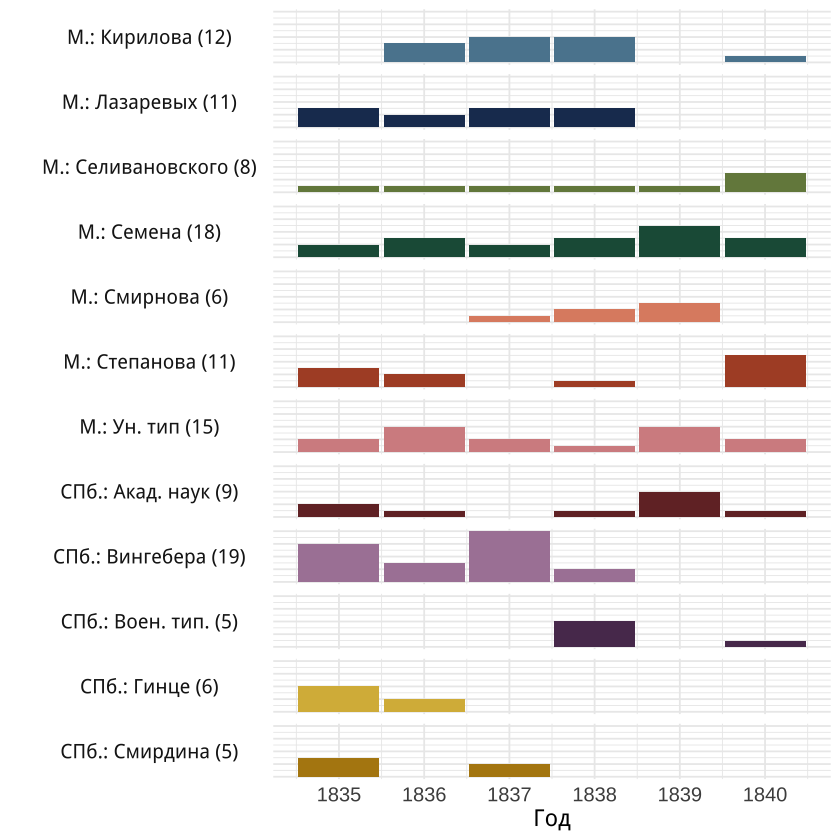

In [28]:
publ_totals <- pb %>% 
  mutate(publisher = paste0(city, ": ", publisher)) %>% 
  filter(publisher != ": ") %>%
  count(publisher, sort = T) %>% 
  rename(total = n)

pb %>% 
  mutate(publisher = paste0(city, ": ", publisher)) %>% 
  filter(publisher != ": ") %>% 
  left_join(publ_totals, by = "publisher") %>% 
  
  # variant 1: select publishers by total n of books
  filter(publisher %in% publ_totals$publisher[1:12]) %>% 
  mutate(publisher = paste0(publisher, " (", total, ")")) %>% 
  count(year, publisher) %>% 
    
  # plot  
  ggplot(aes(x = year, y = n, fill = publisher)) +
  geom_col(width = 0.95) + 
  facet_wrap(~publisher, 
             strip.position = "left",
             ncol = 1) + 
  scale_x_continuous(breaks = seq(1835, 1840, 1)) + 
  scale_fill_met_d(name = "Redon") + 
  labs(x = "Год", 
       y = "") + 
  theme(legend.position = "None",
        strip.text.y.left = element_text(angle = 0),
        strip.placement = "outside",
        strip.text = element_text(size = 12),
        axis.text.y.left = element_blank(),
        axis.text.x = element_text(size = 12),
        axis.title = element_text(size = 14))

# ggsave(file = "plots/Fig_1-4-4.png", plot = last_plot(), dpi = 300,
#        width = 8, height = 10,
#        bg = "white")

#### Plot 1.4.4

Full publishers' data

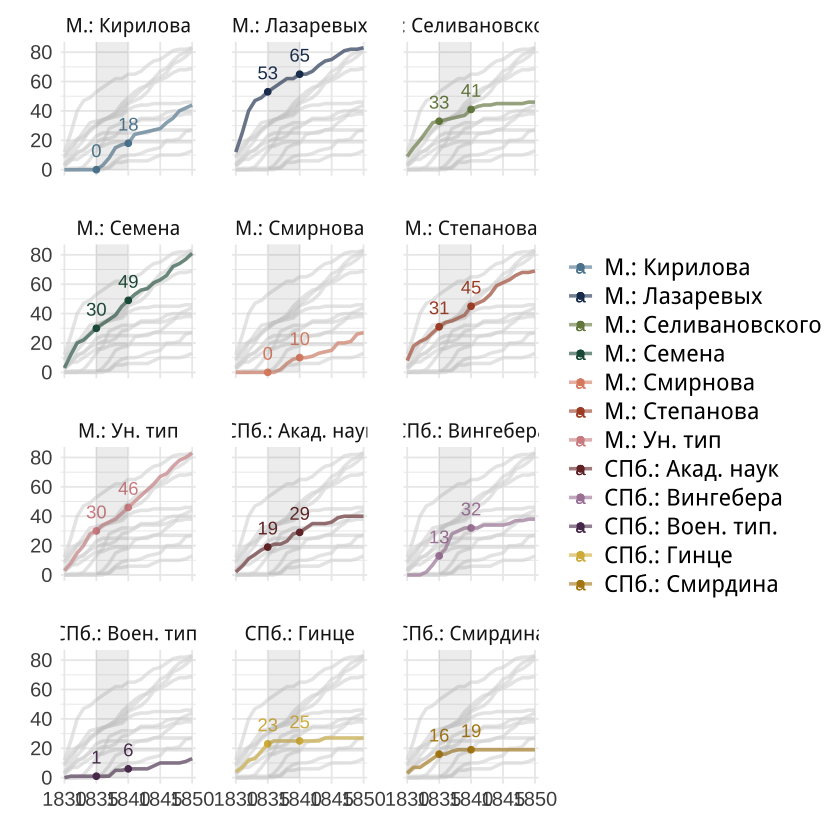

In [29]:
# filter typographies with more than 15 poetry books issued
top_typos_35 <- sort(publ_totals$publisher[1:12])

publ_plot_data <- pb_full %>% 
    mutate(typo = paste0(city, ": ", publisher)) %>% 
    filter(!is.na(year)) %>% 
    #filter(typo %in% top_typos) %>%
    count(typo, year, sort = T) %>% 
    ungroup() %>% 
    pivot_wider(names_from = year, values_from = n) %>%
    mutate_if(is.numeric, ~replace_na(., 0)) %>%
    pivot_longer(!typo, names_to = "year", values_to = "n") %>% 
    arrange(-desc(year)) %>%
    group_by(typo) %>% 
    mutate(cum_sum = cumsum(n),
          typo_group = ifelse(typo %in% top_typos_35, typo, "others")) %>% 
    filter(typo_group != "others")

# glimpse(publ_plot_data)

publ_plot_data %>% 
    ggplot(aes(x = as.factor(year), y = cum_sum, color = typo_group, 
               group = typo)) + 
        geom_line(alpha = 0.6, linewidth = 1) + 
        gghighlight(use_direct_label = FALSE,
              unhighlighted_params = list(colour = alpha("grey85", 1))) + 
        scale_color_met_d(name = "Redon") + 
        
  
        geom_point(data = publ_plot_data %>% 
                     filter(year == 1835) %>% 
                     group_by(typo) %>% 
                     slice_max(cum_sum)
                     ) + 
        geom_text(data = publ_plot_data %>% 
                     filter(year == 1835) %>% 
                     group_by(typo) %>% 
                     slice_max(cum_sum),
                  aes(label = cum_sum),
                  vjust = -1) + 
  
        geom_point(data = publ_plot_data %>% 
                     filter(year == 1840) %>% 
                     group_by(typo) %>% 
                     slice_max(cum_sum)
                     ) + 
        geom_text(data = publ_plot_data %>% 
                     filter(year == 1840) %>% 
                     group_by(typo) %>% 
                     slice_max(cum_sum),
                  aes(label = cum_sum),
                  vjust = -1) +
        
        facet_wrap(~factor(typo_group,
                          levels = top_typos_35),
                   ncol = 3) +
        scale_x_discrete(breaks = seq(1830, 1850, 5)) +
        labs(x = "",
             y = "",
             color = "") + 
        theme(axis.text = element_text(size = 12),
              legend.text = element_text(size = 14),
              strip.text = element_text(size = 12),
              panel.spacing = unit(1.5, "lines")) + 
  
        annotate("rect", 
                 xmin = 6, xmax = 11, 
                 ymin = 0, ymax = Inf, 
                 alpha = 0.1)
  
# ggsave("plots/Fig_1-4-5.png", plot = last_plot(), dpi = 300,
#        height = 12, width = 11,
#        bg = "white")

In [30]:
pb %>% 
  filter(str_detect(publisher, "Смирдин.*")) %>% 
  select(author, title, city, publisher, year)

author,title,city,publisher,year
<chr>,<chr>,<chr>,<chr>,<dbl>
Крылов И.А.,Басни Ивана Крылова : В 8 кн. 30-я тысяча.,СПб.,Смирдина,1835
Пушкин А.С.,Поэмы и повести Александра Пушкина. Ч. 1.,СПб.,Смирдина,1835
Пушкин А.С.,Поэмы и повести Александра Пушкина. Ч. 2.,СПб.,Смирдина,1835
Подолинский А.И.,Повести и мелкие стихотворения А. Подолинского. Ч. 1.,СПб.,"А. Смирдина, И. Глазунова и Ко",1836
Крылов И.А.,Басни Ивана Крылова : В 8 кн. 32-я тыс.,СПб.,Смирдина,1837
Крылов И.А.,Басни Ивана Крылова : В восьми книгах. - 33-я тыс.,СПб.,Смирдина,1837
Подолинский А.И.,Повести и мелкие стихотворения А. Подолинского. Ч. 2. Мелкие стихотворения,СПб.,"А. Смирдина, И. Глазунова и Ко",1837


### Authors

#### Load data

Load authors connector table and authors metadata

In [4]:
# load table with author from pb and author ids
authors_c <- read.csv("../../meta/authors_cols.csv", sep = ";") %>% 
  select(-X) %>% 
  mutate(A_ID = paste0("A_", A_ID))
head(authors_c)

length(unique(pb$author))

pb_authors <- pb %>% 
  left_join(authors_c, by = "author") 

,author,A_ID
,<chr>,<chr>
1,Баратынский Е.А.,A_2
2,Венгер Н.,A_3
3,Деларю М.Д.,A_4
4,Зилов А.М.,A_5
5,Кольцов А.В.,A_7
6,Лебедев В.,A_8


[1] 139

Load authors metadata

In [5]:
authors_meta <- read.delim("../../meta/authors.tsv", sep = "\t") %>% 
  mutate(A_ID = str_replace_all(A_ID, "-", "_"))
head(authors_meta)

,A_ID,RP,author,author_full_name,gender,birth,death,cities_in_1830,aristocracy,stratum,comments,pseudos,links,col_ids,col_is_first_poetry_col
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A_285,,А. Ф. Ф.,,,,,,NA,,unknown,,,,
2,A_1,,А. Я-в,,m,,,,NA,,unknown,,,COL_1,
3,A_88,,Абрамовский С.,Абрамовский Степан,m,,,,NA,,unknown,,,COL_88,
4,A_161,1-26,Айбулат К.М.,Айбулат (Айбулат-Розен) Константин Михайлович,m,1817,1865,Харьков; СПб.,1,,"в 1839 переехал в СПб., был в кругу Краевского и Плетнева",,,,
5,A_226,1-32,Аксаков К.С.,Аксаков Константин Сергеевич,m,1817,1860,М.,1,дворянин,учился на словесн. отд. МУ (1832-35); входил в кружок Станкевича;,,,,
6,A_60,1-43,Аладьина Е.В.,Аладьина Елизавета Васильевна,f,1810,после 1867,СПб.,0,дочь бедного чиновника,"fem; жена Е.В. Аладьина (изд. Невский альманах); дочь бедного чиновника, восп. в Инст. благор. девиц",Ел. Ал.; — А — А,,COL_60,1


Join authors meta with pb

In [6]:
pb_authors <- pb_authors %>% 
  left_join(authors_meta, by = "A_ID")

head(pb_authors)

# cases when author from cols meta is not equal to the author from authors meta:
pb_authors %>% 
  filter(author.x != author.y) %>% 
  select(author.x, author.y)

,id,COL_ID,poetry_prose,book_type,genre,special_tag,author_sign,author.x,author_full_name.x,title,⋯,birth,death,cities_in_1830,aristocracy,stratum,comments,pseudos,links,col_ids,col_is_first_poetry_col
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,688,NA,v,sep,lyr,,Аксаков К.,Аксаков К.С.,Аксаков Константин Сергеевич,"Стихи, читанные в день празднования учреждения Императорского Московского университета 12-го января 1835",⋯,1817,1860,М.,1,дворянин,учился на словесн. отд. МУ (1832-35); входил в кружок Станкевича;,,,,
2,68,COL_2,v,col,lyr,,Баратынский Е.,Баратынский Е.А.,Баратынский Евгений Абрамович,Сочинения Е. Баратынского: В 2 ч.,⋯,1800,1844,М.,1,дворянин,первый ряд,,,COL_2,0
3,849,NA,v,sep,lyr,,Бём А.,Бём А.,Бём Андрей,Утренняя зоря : Стих к Светлому Христову воскресенью,⋯,ок. 1758,после 1835,СПб.,0,,"поэт-самоучка, нем. происхожд; ослеп в возр. ок. 70 лет",,,,
4,90,COL_200,v,col,lyr,,Бенедиктов В.,Бенедиктов В.Г.,Бенедиктов Владимир Григорьевич,Стихотворения Владимира Бенедиктова,⋯,1807,1873,СПб.,1,дворянин,"входит в лит-ру благодаря салону Карлгофов; изд. 1835 издано Карлгофом с его предисл.; наиболее активен в 1835-1838; довел до крайности романтич. стиль, новообразования в языке",,,COL_200,1
5,682,NA,v,sep,lyr,,,Бенецкий Н.Ф.,Бенецкий Николай Францевич,За царя : [Стихотворение] / Пер. Н. Б-н-ц-кий,⋯,1804,1852,Ревель; Вышний Волочок,1,дворянин,"окончил МУ (1825); педагог; баснописец; сб. ""Басни и параболы"" (Ревель, 1830)",,,,
6,69,COL_3,pr,col,lyr,,Венгер Н.,Венгер Н.,Венгер Николай,Сочинения Николая Венгера в стихах и прозе,⋯,,,Одесса,NA,,украинский прозаик,,,COL_3,1


author.x,author.y
<chr>,<chr>
Бенецкий Н.Ф.,Беницкий Н.Ф.
Мейснер А.Я.,Мейснер А.
П. Ш.,Шереметевский П.В.
Баласогло А.П.<?>,Веронов
Макшеева В.Д. / Молчанова В.,Макшеева В.Д.
Мягков Н.Н.,Мягков Н.
Поднебесный М.М.,Поднебесный
Кукольник Н. (изд.),Кукольник Н.В.
Максимович М.,Максимович М.


In [34]:
pb_authors %>% 
  filter(is.na(A_ID)) %>% 
  select(id, COL_ID, A_ID, author_sign, title, year)

# 36 NA-s! meaning no known author, not in the authors metadata

id,COL_ID,A_ID,author_sign,title,year
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1090,NA,NA,,"Арфа златострунная, или песенник",1835
356,NA,NA,,"Весенние цветы, или Собрание романсов, баллад и песен Пушкина, Жуковского, Козлова, Баратынского, Туманского, Ф. Глинки, Ознобишина, Раича, Маркевича, Вяземского и проч.",1835
683,NA,NA,,Князю Дмитрию Владимировичу Голицыну : [Стихотворение],1835
357,NA,NA,,"Летопись факультетов на 1835 год, изданная в двух книгах А. Галичем и В. Плаксиным. Кн. 1.",1835
87,COL_17,NA,,Стихотворение на столетие литейного дома с арсенала в Петербурге 1835 года 6 августа,1835
127,COL_142,NA,,"Куплеты, петые в московском Английском клубе 14 ноября 1836, по случаю праздника, данного членами оного его сиятельству князю Дмитрию Владимировичу Голицыну",1836
1094,NA,NA,,Малороссийские и червонорусские народные думы и песни,1836
121,COL_35,NA,,Маскерад. Подарок прекрасному полу на 1837 год,1836
122,COL_36,NA,,Мечты при луне. Стихотворения,1836


#### RP authors vs NA

In [35]:
print("Number of known unique authors (-NA, - '')")
length(unique(pb_authors$author.x)) # 137 unique authors (- NA, - "")


total_known <- 55+82
print(c("Percent of unknown authors" , 
        55/total_known*100 ))  # 40% of authors IN THE META are unknown

print(c("Percent of known (by RP) authors" , 
        82/total_known*100 )) # 59.85 known by RP

total_n_groups <- pb_authors %>% 
  count(group_abbr)

# total: summarise NA and non-RP
pb_authors %>% 
  filter(!str_detect(RP, "\\d")) %>%  # 62
  count(group_abbr) %>% 
  rename(unknown_authors = n) %>% 
  left_join(total_n_groups, by = "group_abbr") %>% 
  mutate(perc_unknown  = round((unknown_authors/n) * 100, 2) )

[1] "Number of known unique authors (-NA, - '')"


[1] 139

[1] "Percent of unknown authors" "40.1459854014599"          
[1] "Percent of known (by RP) authors" "59.8540145985402"                


group_abbr,unknown_authors,n,perc_unknown
<chr>,<int>,<int>,<dbl>
alm,3,25,12.00
col_lyr,40,139,28.78
sep_lyr,19,54,35.19


Authors without RP article:

In [36]:
pb_authors %>% 
  filter(!is.na(A_ID)) %>% 
  select(A_ID, author.y, RP) %>% 
  distinct() %>% 
  filter(RP == "") # 55 authors without RP articles

A_ID,author.y,RP
<chr>,<chr>,<chr>
A_3,Венгер Н.,
A_290,Красноглазов А.,
A_8,Лебедев В.,
A_12,Риль Ю.,
A_14,Савурский Н.,
A_297,Семенов П.,
A_16,Топчибашев М. Д.,
A_299,Хвостов Д. И.,
A_300,Хлебников Н.,


Authors with RP articles:

In [38]:
pb_authors %>% 
  filter(!is.na(A_ID)) %>% 
  select(A_ID, author.y, RP) %>% 
  distinct() %>% 
  filter(str_detect(RP, "\\d")) %>% 
  nrow() # 82 authors with RP articles

[1] 82

#### Authors feats

In [39]:
# Aristocracy
pb_authors %>% 
  select(author.y, aristocracy) %>% 
  distinct() %>% 
  mutate(aristocracy = ifelse(is.na(aristocracy), "not_available", aristocracy)) %>% 
  count(aristocracy) %>% 
  mutate(perc = round((n/138)*100, 2))

# total n for col_lyr (unique authors)
31+61+46

pb_authors %>% 
  select(author.y, gender) %>% 
  distinct() %>% 
  mutate(gender = ifelse(is.na(gender), "not_available", gender)) %>% 
  count(gender) %>% 
  mutate(perc = round((n/138)*100, 2))

1+7+129+1

aristocracy,n,perc
<chr>,<int>,<dbl>
0,33,23.91
1,59,42.75
not_available,46,33.33


[1] 138

gender,n,perc
<chr>,<int>,<dbl>
,1,0.72
f,7,5.07
m,129,93.48
not_available,1,0.72


[1] 138

Same but only for poetry collections:

In [40]:
# Aristocracy
pb_authors %>% 
  filter(group_abbr == "col_lyr") %>% 
  select(author.y, aristocracy) %>% 
  distinct() %>% 
  mutate(aristocracy = ifelse(is.na(aristocracy), "not_available", aristocracy)) %>% 
  count(aristocracy) %>% 
  mutate(perc = round((n/101)*100, 2))

# total n for col_lyr (unique authors)
22+45+34

pb_authors %>% 
  filter(group_abbr == "col_lyr") %>% 
  select(author.y, gender) %>% 
  distinct() %>% 
  mutate(gender = ifelse(is.na(gender), "not_available", gender)) %>% 
  count(gender) %>% 
  mutate(perc = round((n/101)*100, 2))

1+7+92+1

aristocracy,n,perc
<chr>,<int>,<dbl>
0,24,23.76
1,43,42.57
not_available,34,33.66


[1] 101

gender,n,perc
<chr>,<int>,<dbl>
,1,0.99
f,7,6.93
m,92,91.09
not_available,1,0.99


[1] 101

Book types in relation to aristocracy

In [42]:
pb_authors %>% 
  select(author.y, group_abbr, aristocracy) %>% 
  distinct() %>% 
  mutate(aristocracy = ifelse(is.na(aristocracy), "not_available", aristocracy)) %>% 
  group_by(group_abbr) %>% 
  count(aristocracy)

group_abbr,aristocracy,n
<chr>,<chr>,<int>
alm,0,3
alm,1,4
alm,not_available,3
col_lyr,0,24
col_lyr,1,43
col_lyr,not_available,34
sep_lyr,0,8
sep_lyr,1,16
sep_lyr,not_available,11


##### age

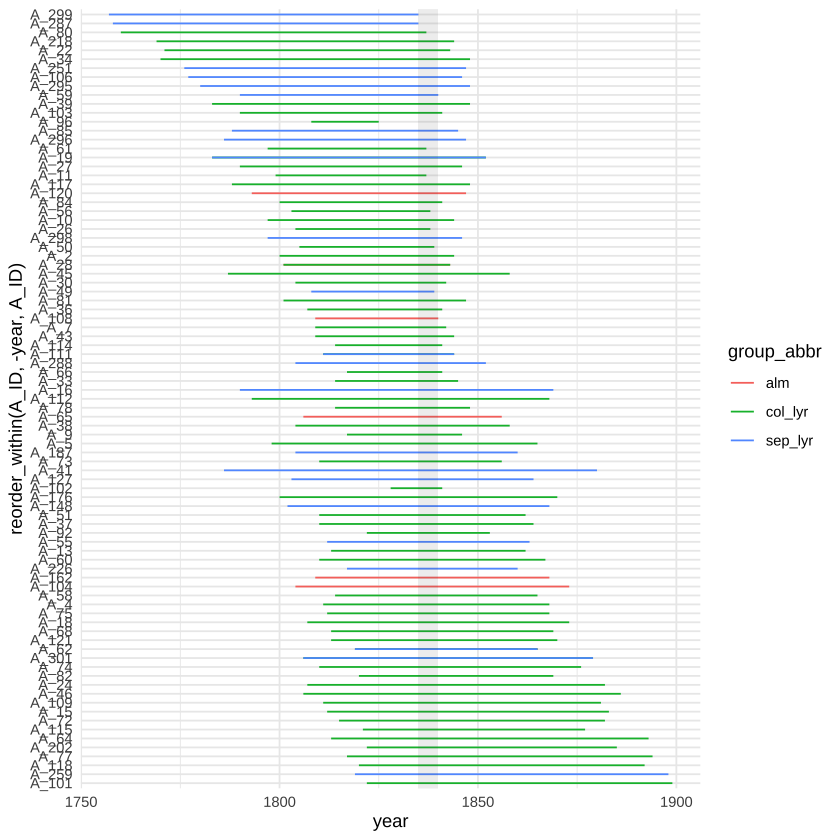

In [43]:
library(tidytext)

pb_authors %>% 
  filter(str_detect(birth, "\\d") & str_detect(death, "\\d")) %>% 
  mutate(birth = as.numeric(str_extract(birth, "\\d{4}")),
         death = as.numeric(str_extract(death, "\\d{4}")),
         RP = ifelse(str_detect(RP, "\\d+"), TRUE, FALSE)) %>% 
  select(A_ID, group_abbr, RP, birth, death) %>% 
  pivot_longer(!c(A_ID, group_abbr, RP), names_to = "event", values_to = "year") %>% 
  ggplot(aes(x = year,
    y = reorder_within(A_ID, -year, A_ID),
    color = group_abbr)) + 
  geom_line() + 
  scale_y_reordered() +
  #theme(legend.position = "None") + 
    annotate("rect", xmin = 1835, xmax = 1840,
             ymin = -Inf, ymax = Inf, 
             alpha = 0.1)

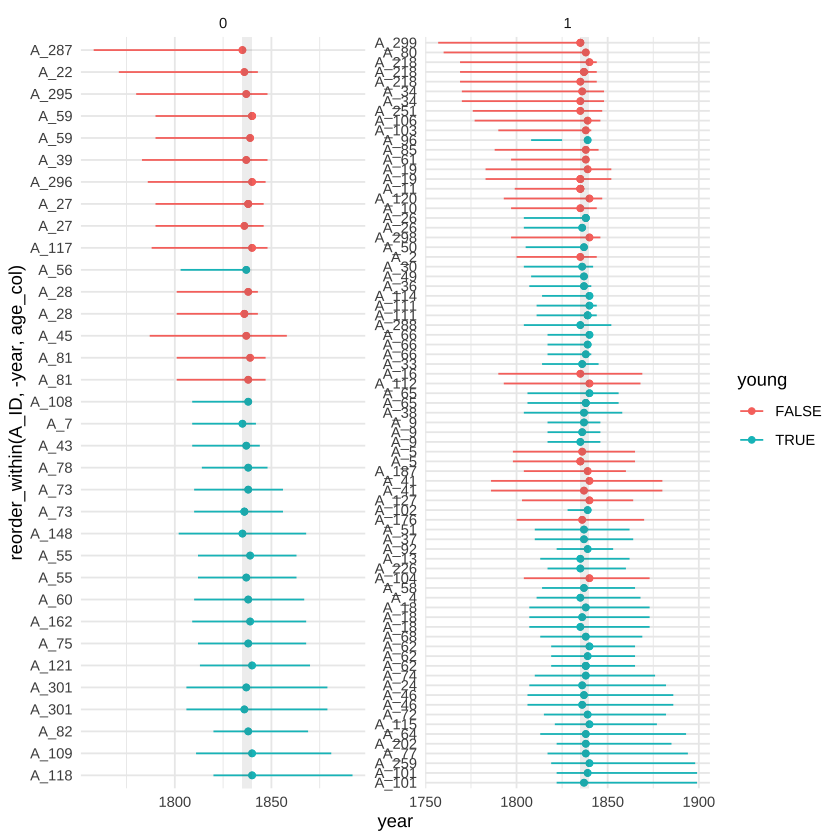

In [44]:
pb_authors %>% 
  filter(str_detect(birth, "\\d") & str_detect(death, "\\d")) %>% 
  mutate(birth = as.numeric(str_extract(birth, "\\d{4}")),
         death = as.numeric(str_extract(death, "\\d{4}")),
         RP = ifelse(str_detect(RP, "\\d+"), TRUE, FALSE)) %>% 
  select(A_ID, group_abbr, aristocracy, birth, death, year) %>% 
  mutate(age_col = year - birth) %>% 
  rename(year_col = year) %>% 
  pivot_longer(!c(A_ID, group_abbr, aristocracy, age_col, year_col), 
               names_to = "event", values_to = "year") %>% 
  filter(!is.na(aristocracy)) %>% 
  mutate(young = ifelse(age_col < 35, TRUE, FALSE)) %>% 
  ggplot(aes(x = year,
    y = reorder_within(A_ID, -year, age_col),
    color = young)) +
  geom_line() + 
  geom_point(aes(x = year_col)) + 
  scale_y_reordered() +
  facet_wrap(~aristocracy, scales = "free") +
  #theme(legend.position = "None") +
    annotate("rect", xmin = 1835, xmax = 1840,
             ymin = -Inf, ymax = Inf,
             alpha = 0.1)

In [45]:
rm(authors_c, authors_meta, total_n_groups, total_known)

#### Authors from RNC / Periodicals

##### RNC

In [46]:
load("../../data/nkrja_19th_lem.Rda")

head(unique(c19$author))

[1] "С. С. Бобров"    "С. А. Тучков"    "С. С. Пестов"    "П. П. Сумароков"
[5] "Н. С. Смирнов"   "П. А. Словцов"

Cleaning RNC authors to match with `pb_authors` data

In [48]:
# all RNC

rnc_authors <- c19 %>% 
  select(author) %>% 
  mutate(author_rnc = str_replace_all(author, "(\\w\\.\\s\\w\\.)\\s(\\w+)$",
                                       "\\2 \\1"),
         author_rnc = str_remove_all(author_rnc, "[[:punct:]]|[[:space:]]")) %>% 
  distinct() %>% 
  select(author_rnc)

head(rnc_authors)

rnc1830 <- c19 %>% 
  filter(year > 1829 & year < 1840) %>% 
  select(author) %>% 
  mutate(author_rnc = str_replace_all(author, "(\\w\\.\\s\\w\\.)\\s(\\w+)$",
                                       "\\2 \\1"),
         author_rnc = str_remove_all(author_rnc, "[[:punct:]]|[[:space:]]")) %>% 
  distinct() %>% 
  select(author_rnc)

head(rnc1830)

,author_rnc
,<chr>
1,БобровСС
2,ТучковСА
3,ПестовСС
4,СумароковПП
5,СмирновНС
6,СловцовПА


,author_rnc
,<chr>
1,ГлинкаСН
2,ШаликовПИ
3,ПушкинВЛ
4,Неизвестный
5,ПСБобрищевПушкин
6,ГнедичНИ


Same string manipulations with pb data

In [51]:
authors_comparison <- pb_authors %>% 
  select(author.y) %>% 
  mutate(author_rnc = str_remove_all(author.y, "[[:punct:]]|[[:space:]]")) %>% 
  distinct() %>% 
  select(author_rnc) 

print("Authors included in RNC & printed a book of poetry:")
authors_comparison %>% 
  inner_join(rnc_authors, by = "author_rnc")

authors_comparison %>% 
  inner_join(rnc_authors, by = "author_rnc") %>%
  nrow() # 29 authors intersection PB & all RNC

authors_comparison %>% 
  inner_join(rnc1830, by = "author_rnc") %>% 
  nrow() # 27 authors intersection PB & RNC 1830s

print("Percent of intersected authors btw RNC & PB:")
(29/ (nrow(authors_comparison)-1) )*100

[1] "Authors included in RNC & printed a book of poetry:"


author_rnc
<chr>
БаратынскийЕА
БенедиктовВГ
ГлинкаСН
ДеларюМД
ЖуковскийВА
КольцовАВ
КрыловИА
МятлевИП
ПушкинАС


[1] 29

[1] 27

[1] "Percent of intersected authors btw RNC & PB:"


[1] 21.16788

In [52]:
rm(c19, authors_comparison, rnc_authors, rnc1830)

##### Periodicals

In [7]:
per_meta <- read.delim("../../meta/database_poems_published_in_journals.tsv",
                       sep = "\t")

head(per_meta)

per_authors <- per_meta %>% 
  select(A_ID, Author_Initials) %>% 
  distinct() %>% 
  filter(!is.na(A_ID)) %>% 
  mutate(A_ID = str_replace_all(A_ID, "-", "_"))

rm(per_meta)

,text_ID,txt_raw,text,Unmed..0,author_nkrja,A_ID,Author_Initials,Text_title,First_line,PER_ID,⋯,Vol,Num,Pages,Subtitle,Author_sign,Author_full_name,Author_birth,Author_death,RP_biography,Comment
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,P_1,,,NA,,NA,NA,Солдатская песня,"Ох жизнь, молодецкая",Сев_пч,⋯,NA,12,46,NA,NA,NA,NA,NA,NA,
2,P_2,,,NA,,NA,NA,Прощальная песнь,В последний раз еще встречая,Сев_пч,⋯,NA,37,148,NA,П. Любимов,NA,NA,NA,NA,
3,P_3,,,NA,,A-137,Шишков А.С.,NA,На скованных зимой жестокою водах,Сев_пч,⋯,NA,55,219,NA,А.С. Шишков,Шишков Александр Семенович,1754,1841,NA,
4,P_4,,,NA,,NA,NA,NA,Ужели напрасно,Сев_пч,⋯,NA,61,242,NA,NA,NA,NA,NA,NA,
5,P_5,,,NA,,A-17,Цитович Н.Д.,Голод у зверей,Случился у зверей вдруг голод пребольшой,Сев_пч,⋯,NA,100,397,NA,Цитович Н.,Цитович Николай Дмитриевич,NA,NA,NA,
6,P_6,,,8934,И. П. Мятлев,NA,NA,Вечер,Уже догорало,Сев_пч,⋯,NA,108,429,NA,NA,NA,NA,NA,NA,


In [8]:
head(per_authors)

,A_ID,Author_Initials
,<chr>,<chr>
1,A_137,Шишков А.С.
2,A_17,Цитович Н.Д.
3,A_74,Марков М.А.
4,A_2,Баратынский Е.А.
5,A_50,Якубович Л.А.
6,A_138,Кутайсов А.И.


In [9]:
print(c("Number of authors in periodicals (by A_ID):", 
      length(unique(per_authors$A_ID))))

print(c("Number of authors in poetry books (by A_ID):", 
      length(unique(pb_authors$A_ID))))

[1] "Number of authors in periodicals (by A_ID):"
[2] "187"                                        
[1] "Number of authors in poetry books (by A_ID):"
[2] "138"                                         


In [15]:
print("Intersection:")

per_pb_intersection <- pb_authors %>% 
  select(A_ID, author.y) %>% 
  inner_join(per_authors, by = "A_ID") %>% 
  distinct()

nrow(per_pb_intersection)

print(c("Percent of all PB authors intersected with periodicals:",
        round(
          ( nrow(per_pb_intersection)/ (length(unique(pb_authors$A_ID)) - 1) )*100, 
          2)
        ))

head(per_pb_intersection) # quick check

[1] "Intersection:"


[1] 45

[1] "Percent of all PB authors intersected with periodicals:"
[2] "32.85"                                                  


,A_ID,author.y,Author_Initials
,<chr>,<chr>,<chr>
1,A_226,Аксаков К.С.,Аксаков К.С.
2,A_2,Баратынский Е.А.,Баратынский Е.А.
3,A_18,Бенедиктов В.Г.,Бенедиктов В.Г.
4,A_251,Глинка С.Н.,Глинка С.Н.
5,A_4,Деларю М.Д.,Деларю М.Д.
6,A_19,Жуковский В.А.,Жуковский В.А.


In [14]:
print("Intersection only in poetry collections:")

per_pb_antijoin <- pb_authors %>% 
  filter(group_abbr == "col_lyr") %>% 
  select(A_ID, author.y) %>% 
  filter(!author.y %in% per_authors$Author_Initials & !is.na(author.y)) %>%
  distinct()

nrow(per_pb_antijoin)

print(c("Percent of all PB authors (cols only) who were NOT in periodicals:",
        round(
          ( nrow(per_pb_antijoin)/ (length(unique(pb_authors$A_ID)) - 1) )*100, 
          2)
        ))

per_pb_antijoin

[1] "Intersection only in poetry collections:"


[1] 64

[1] "Percent of all PB authors (cols only) who were NOT in periodicals:"
[2] "46.72"                                                             


A_ID,author.y
<chr>,<chr>
A_3,Венгер Н.
A_13,Геевский С.Л.
A_8,Лебедев В.
A_34,Майков М.А.
A_9,Меркли М.М.
A_10,Мятлев И.П.
A_12,Риль Ю.
A_14,Савурский Н.
A_297,Семенов П.


In [ ]:
# rm(authors_c, authors_meta, per_authors, per_pb_intersection, 
#   total_known, total_n_groups)

### Reviews

In [16]:
reviews <- read.delim("../../meta/collections_reviews.tsv",
                      sep = "\t")

head(reviews)

,id,COL_ID,Author,Title,City,Printed_in..В.тип...,Year,Sovr,Sovr_score,OZ,⋯,JMNP_date,JMNP,JMNP_sign,JMNP_score,Sev_pchela,Sev_pchela_reviewer_sign,Sev_pch_score,BdCH,BdCH_score,Other
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,COL_1,А. Я-в,Кривой бес. Русская сказка [Стихотворения],СПб.,,1835,,,,⋯,NA,,,,,,,1835. Т. 11. С. 1,neg,Есть рец. Белинского на “Кривого беса” изд. 1845 г. в ОЗ
2,NA,COL_2,Баратынский Е.,Сочинения Е. Баратынского,М.,,1835,,,,⋯,NA,,,,,,,,,
3,NA,COL_3,Венгер Н.,Сочинения Николая Венгера в стихах и прозе,М.,Селивановского,1835,,,,⋯,NA,,,,,,,,,
4,NA,COL_4,Деларю М.,Опыты в стихах Михаила Деларю,СПб.,Деп. внешней торговли,1835,,,,⋯,NA,,,,1835. № 101. 8 мая. С. 401-402,Р.М.,neg,1835. Т. 10. С. 30-31,,
5,NA,COL_5,Зилов А.,Стихотворения Алексея Зилова [Тетрадь 1-я],М.,Лазаревых института восточных языков,1835,,,,⋯,NA,,,,1835. № 114. 24 мая. С. 453-454,,???; скорее негативная,1835. Т. 10. С. 29-30,,
6,NA,COL_6,Кожухов Н.,"Переводы с французского прозою, и сочинения в стихах Н. Кожухова",М.,Лазаревых института восточных языков,1835,,,,⋯,NA,,,,,,,1835. Т. 12. С. 3,neg,


Attach reviews to `pb`

In [17]:
pb_reviews <- pb %>% 
  rename(new_id = id) %>% 
  left_join(reviews %>% 
              filter(!is.na(COL_ID)) %>% 
              select(-Author, -Title),
            by = "COL_ID") 

head(pb_reviews)

,new_id,COL_ID,poetry_prose,book_type,genre,special_tag,author_sign,author,author_full_name,title,⋯,JMNP_date,JMNP,JMNP_sign,JMNP_score,Sev_pchela,Sev_pchela_reviewer_sign,Sev_pch_score,BdCH,BdCH_score,Other
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,688,NA,v,sep,lyr,,Аксаков К.,Аксаков К.С.,Аксаков Константин Сергеевич,"Стихи, читанные в день празднования учреждения Императорского Московского университета 12-го января 1835",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,68,COL_2,v,col,lyr,,Баратынский Е.,Баратынский Е.А.,Баратынский Евгений Абрамович,Сочинения Е. Баратынского: В 2 ч.,⋯,NA,,,,,,,,,
3,849,NA,v,sep,lyr,,Бём А.,Бём А.,Бём Андрей,Утренняя зоря : Стих к Светлому Христову воскресенью,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,90,COL_200,v,col,lyr,,Бенедиктов В.,Бенедиктов В.Г.,Бенедиктов Владимир Григорьевич,Стихотворения Владимира Бенедиктова,⋯,NA,1836. Ч. 9. № 1. С. 192-199,Я. Неверов,pos,1835. № 240. 24 окт. С. 957-959,Р.М.,pos,1835. Т. 13. С. 1-3,pos; но с уколом о плохих сонетах,
5,682,NA,v,sep,lyr,,,Бенецкий Н.Ф.,Бенецкий Николай Францевич,За царя : [Стихотворение] / Пер. Н. Б-н-ц-кий,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,69,COL_3,pr,col,lyr,,Венгер Н.,Венгер Н.,Венгер Николай,Сочинения Николая Венгера в стихах и прозе,⋯,NA,,,,,,,,,


Number of reviewed books (in general and in groups)

In [18]:
print("Total number of reviews:")

pb_reviews %>% 
  select(new_id, group_abbr, author, title, year,
         Sovr, OZ, CO, MN, Telescope, JMNP, Sev_pchela, BdCH) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year),
              names_to = "reviewer",
              values_to = "score") %>% 
  filter(!is.na(score) & score != "") %>% 
  nrow()

[1] "Total number of reviews:"


[1] 343

Number of reviewed books (out of total 218)

In [63]:
print("Total number of reviewed books:")
pb_reviews %>% 
  select(new_id, group_abbr, author, title, year,
         Sovr, OZ, CO, MN, Telescope, JMNP, Sev_pchela, BdCH) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year),
              names_to = "reviewer",
              values_to = "score") %>% 
  filter(!is.na(score) & score != "") %>% 
  select(-reviewer, -score) %>% 
  distinct() %>% 
  nrow()

total_n_groups <- pb %>% 
  count(group_abbr) %>% 
  rename(total = n)

pb_reviews %>% 
  select(new_id, group_abbr, author, title, year,
         Sovr, OZ, CO, MN, Telescope, JMNP, Sev_pchela, BdCH) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year),
              names_to = "reviewer",
              values_to = "score") %>% 
  filter(!is.na(score) & score != "") %>% 
  select(-reviewer, -score) %>% 
  distinct() %>% 
  count(group_abbr) %>% 
  left_join(total_n_groups, by = "group_abbr") %>% 
  mutate(perc_reviewed = round( (n/total)*100, 2 ))

[1] "Total number of reviewed books:"


[1] 137

group_abbr,n,total,perc_reviewed
<chr>,<int>,<int>,<dbl>
alm,19,25,76.00
col_lyr,105,139,75.54
sep_lyr,13,54,24.07


Number of positive/negative reviews by source

In [19]:
pb_reviews %>% 
  select(new_id, group_abbr, author, title, year,
         Sovr_score, OZ_score, CO_score, MN_score, Telescope_score, JMNP_score,
         Sev_pch_score, BdCH_score) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year),
              names_to = "reviewer",
              values_to = "score") %>% 
  filter(!is.na(score) & score != "") %>% 
  mutate(score_cln = str_extract(score, "neg"),
         score_cln = ifelse(str_detect(score, "pos"), "pos", score_cln),
         score_cln = ifelse(is.na(score_cln), "neutr", score_cln)) %>% 
  group_by(reviewer) %>% 
  count(score_cln) %>% 
  ungroup() %>% 
  pivot_wider(names_from = score_cln, values_from = n) %>% 
  mutate(total_reviews = rowSums(.[2:4], na.rm = TRUE)) %>% 
  mutate(perc_pos = (pos/total_reviews)*100,
        perc_neg = (neg/total_reviews)*100,
        perc_neutr = (neutr/total_reviews)*100) %>% 
  select(reviewer, total_reviews, 
         pos, perc_pos,
         neutr, perc_neutr,
         neg, perc_neg
        )

reviewer,total_reviews,pos,perc_pos,neutr,perc_neutr,neg,perc_neg
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
BdCH_score,82,26,31.70732,5,6.097561,51,62.19512
CO_score,53,21,39.62264,2,3.773585,30,56.60377
JMNP_score,30,22,73.33333,2,6.666667,6,20.00000
MN_score,1,NA,NA,NA,NA,1,100.00000
OZ_score,44,16,36.36364,2,4.545455,26,59.09091
Sev_pch_score,55,28,50.90909,6,10.909091,21,38.18182
Sovr_score,58,16,27.58621,NA,NA,42,72.41379
Telescope_score,12,3,25.00000,NA,NA,9,75.00000


Number of reviews for each book

In [66]:
n_reviews <- pb_reviews %>% 
  select(new_id, group_abbr, author, title, year, 
         Sovr, OZ, CO, MN, Telescope, JMNP, Sev_pchela, BdCH) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year), 
               names_to = "reviewer",
               values_to = "is_reviewed") %>% 
  mutate(is_reviewed = ifelse(is.na(is_reviewed)| is_reviewed == "", 
                              0, 
                              1)) %>% 
  pivot_wider(names_from = reviewer, values_from = is_reviewed) %>% 
  mutate(n_reviews = rowSums(.[6:13])) %>% 
  arrange(desc(n_reviews))

head(n_reviews, 20)


new_id,group_abbr,author,title,year,Sovr,OZ,CO,MN,Telescope,JMNP,Sev_pchela,BdCH,n_reviews
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
269,col_lyr,Шахова Е.Н.,Стихотворения Елизаветы Шаховой,1839,1,1,1,0,0,1,1,1,6
301,alm,,"Одесский Альманах, на 1840 год",1839,1,1,1,0,0,1,1,1,6
339,alm,Владиславлев В.А.,Утренняя заря Альманах Владиславлева на 1840 год. 2-й год,1840,1,1,1,0,0,1,1,1,6
316,col_lyr,Некрасов Н.А.,Мечты и звуки. Стихотворения Н.Н.,1840,1,1,1,0,0,1,1,1,6
189,col_lyr,Бенедиктов В.Г.,Стихотворения В. Бенедиктова. Кн. 2.,1838,1,1,1,0,0,0,1,1,5
299,alm,,Опыты в Русской Словесности воспитанников Гимназии Белорусского Учебного Округа. Напечатанные по приказанию Г. Министра Народного Просвещения,1839,0,1,1,0,0,1,1,1,5
90,col_lyr,Бенедиктов В.Г.,Стихотворения Владимира Бенедиктова,1835,0,0,0,0,1,1,1,1,4
73,col_lyr,Кольцов А.В.,Стихотворения Алексея Кольцова,1835,0,0,1,0,1,1,1,0,4
85,col_lyr,Тимофеев А.В.,Песни: В 2 ч.,1835,0,0,0,1,1,0,1,1,4


In [30]:
pb_reviews %>% 
  select(new_id, group_abbr, author, title, year,
         Sovr_score, OZ_score, CO_score, MN_score, Telescope_score, JMNP_score,
         Sev_pch_score, BdCH_score) %>% 
  pivot_longer(!c(new_id, group_abbr, author, title, year),
              names_to = "reviewer",
              values_to = "score") %>% 
  filter(!is.na(score) & score != "") %>% 
  mutate(score_cln = str_extract(score, "neg"),
         score_cln = ifelse(str_detect(score, "pos"), "pos", score_cln),
         score_cln = ifelse(is.na(score_cln), "neutr", score_cln)) %>% 
  mutate(book = paste(year, "_", author, title)) %>% 
  select(-c(score, new_id, group_abbr, author, title, year)) %>% 
  group_by(book) %>% 
  count(score_cln, sort = T) %>% 
  ungroup() %>% 
  pivot_wider(names_from = score_cln,
             values_from = n) %>% 
  mutate(total_reviews = rowSums(.[2:4], na.rm = TRUE)) %>% 
  separate(book, into = c("year", "title"), sep = " _ ") %>% 
  group_by(year) %>% 
  slice_max(total_reviews, n = 5) %>% 
  select(year, title, pos, neutr, neg, total_reviews)

year,title,pos,neutr,neg,total_reviews
<chr>,<chr>,<int>,<int>,<int>,<dbl>
1835,Бенедиктов В.Г. Стихотворения Владимира Бенедиктова,3,NA,1,4
1835,Кольцов А.В. Стихотворения Алексея Кольцова,3,1,NA,4
1835,Тимофеев А.В. Песни: В 2 ч.,2,NA,2,4
1835,Савурский Н. Весенняя ветка. Стихотворения,NA,NA,2,2
1835,Меркли М.М. Стихотворения Михаила Меркли,1,NA,1,2
1836,Бенедиктов В.Г. Стихотворения Владимира Бенедиктова / Изд. 2-е,2,NA,2,4
1836,Мейснер А.Я. Стихотворения Алексея Мейснера,2,NA,2,4
1836,Аполлон де *** Стихотворения Аполлона де ***,NA,NA,3,3
1836,"Крыловский В. Мое новоселье. Альманах на 1836 год, изд. В. Крыловским",NA,NA,3,3
